In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("customer_churn.csv")

In [10]:
df
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df["TotalCharges"] = df ["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df ["TotalCharges"].astype("float")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
df.isnull().sum().sum()

0

In [19]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [21]:
df.duplicated().sum()

0

In [23]:
df["customerID"].duplicated().sum()

0

# Converted 0 and 1 values of senior citizens to yes/no to make it easier to understand

In [34]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [36]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


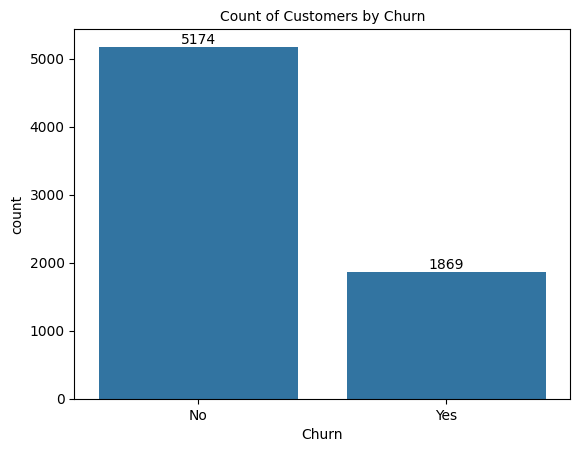

In [7]:
ax =sns.countplot(x = "Churn", data= df )

ax.bar_label(ax.containers[0])
plt.title ("Count of Customers by Churn",fontsize=10)
plt.show()

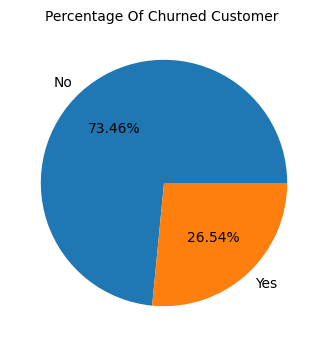

In [50]:
plt.figure (figsize=(4,4))
gb = df.groupby("Churn").agg({"Churn" : "count"})
plt.pie(gb[ "Churn" ],labels = gb.index,autopct = "%1.2f%%")
plt.title("Percentage Of Churned Customer ", fontsize=10 )
plt.show()

# from  the given pie chart we can conclude that 26.54% of our customers have churned out.# now lets explore the reason behind it 

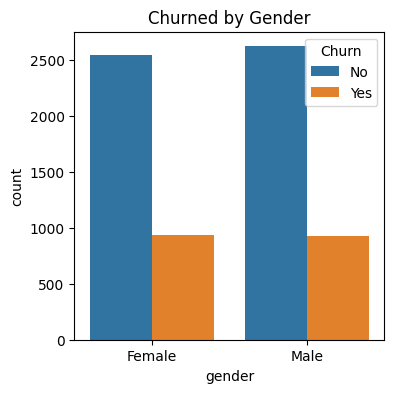

In [8]:
plt.figure (figsize=(4,4))
sns.countplot(x="gender",data = df,hue="Churn")
plt.title ("Churned by Gender")
plt.show()

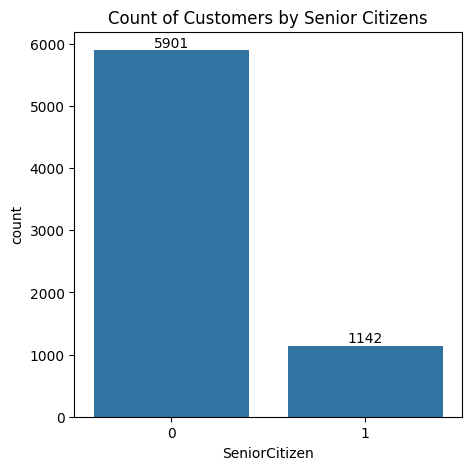

In [13]:
plt.figure (figsize=(5,5))
ax=sns.countplot(x="SeniorCitizen",data = df)
ax.bar_label(ax.containers[0])
plt.title ("Count of Customers by Senior Citizens")
plt.show()

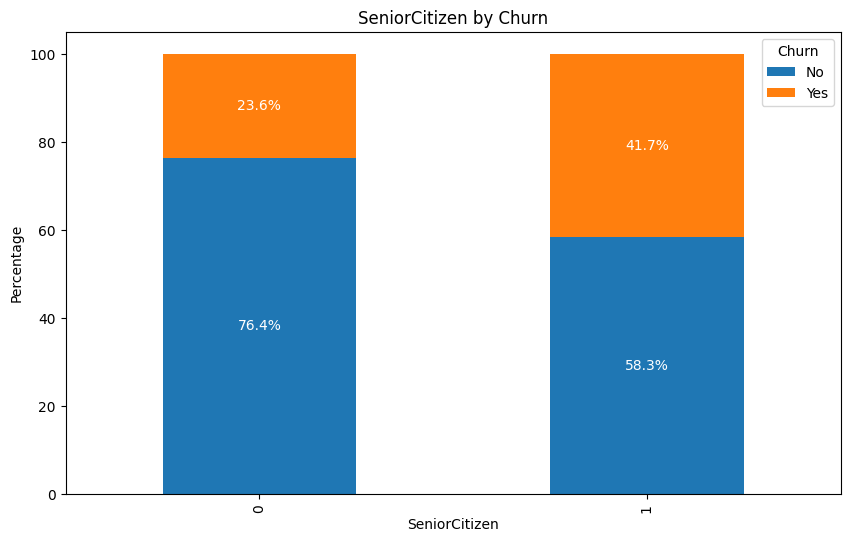

In [19]:
# Group by 'SeniorCitizen' and 'Churn', and then unstack
count_data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack().fillna(0)

# Calculate the percentages
count_data_percent = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Plotting
ax = count_data_percent.plot(kind='bar', stacked=True, figsize=(10,6), color=['#1f77b4', '#ff7f0e'])

# Adding the percentage labels
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='white')

plt.title('SeniorCitizen by Churn')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage')
plt.legend(title='Churn')
plt.show()


# comparative a greater petrcentage of people in senior citizens category have churned

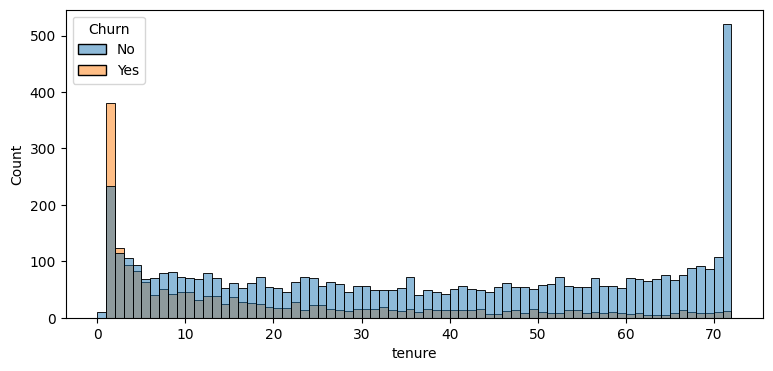

In [21]:
plt.figure(figsize = (9,4))
sns.histplot(x="tenure",data= df,bins = 72 ,hue= "Churn")
plt.show()

# people who have used our services for a long time have stayed and people who have used our services #1 or 2 months have churned

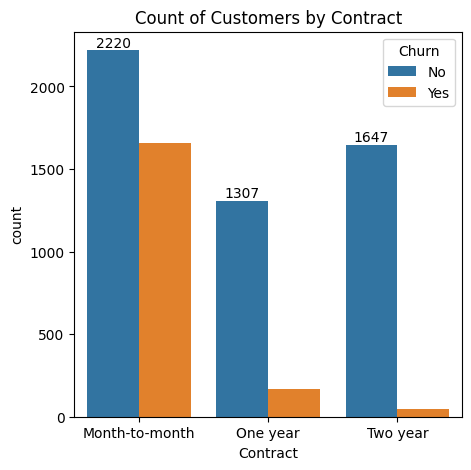

In [24]:
plt.figure (figsize=(5,5))
ax=sns.countplot(x="Contract",data = df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title ("Count of Customers by Contract")
plt.show()

# people who have month contract are likely to churn then from those who have 1 or 2 years or contarct.


In [27]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

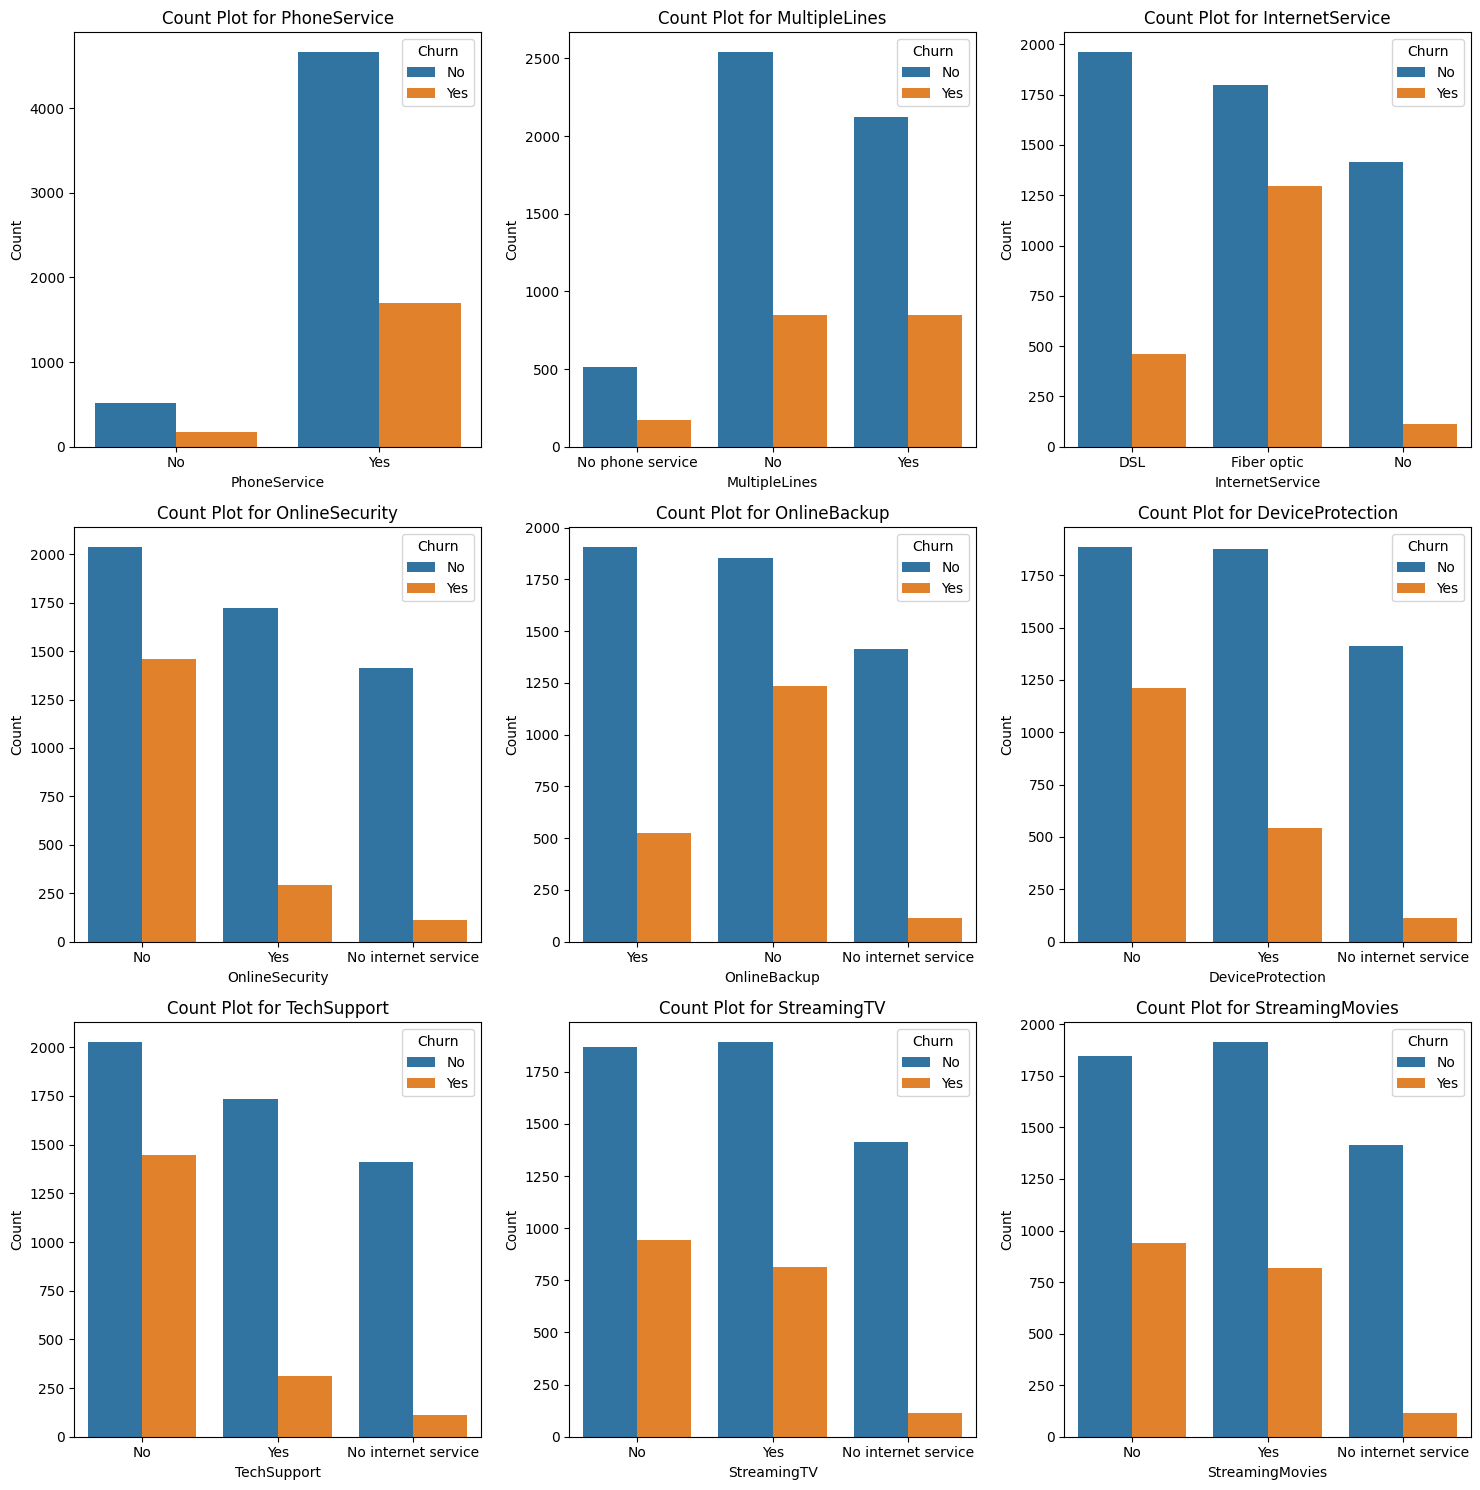

In [31]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each countplot
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i],hue= df["Churn"])
    axes[i].set_title(f'Count Plot for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    # Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# The visualizations presents count plots showing customers churn (Yes/No) across various service features such as PhoneServices,MultiLines,Internet Service,and OnlineSecuritry. The majority of the customers who do not churn tend to have services like PhoneServices,InternertServices (particularly DSL) and OnlineSecurity enabled. For services like onlineBackup,TechSupport and StreamingTv, churn rates are noticeably higher when these services are not used or are unavailable. The charts emphasize the realationship between services usage and customers churn.


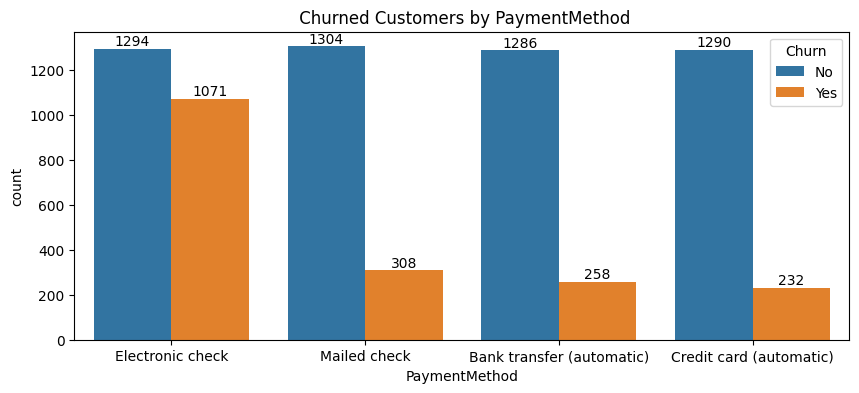

In [35]:
plt.figure (figsize=(10,4))
ax=sns.countplot(x="PaymentMethod",data = df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title (" Churned Customers by PaymentMethod")
plt.show()

# customer is likely to churn when is using electronic check  as a payment method